In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import prince
from __future__ import division
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
survey=pd.read_csv('survey.csv')
survey

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


# Data preprocessing


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
survey.shape

(1259, 27)

In [5]:
#reolacing all of the empty values with nan:
survey.replace('',np.nan)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [6]:
survey.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
survey.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### dealing with missing data

In [8]:
survey['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [9]:
#for self_employed column i will replace the missing values with 'no' because thats more common in the column
survey['self_employed']=survey['self_employed'].replace(np.nan,'No')

##### 'work_interfere' is the target variable for work_interfere column i will replace the missing values with 'No' because i assume that if someone has not aswered to that question it means that they don't have mental health condition (as the question starts with 'if you have a mental health condition...')


In [10]:
survey['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [11]:
survey['work_interfere']=survey['work_interfere'].replace(np.nan,'No')

### removing irrelevant columns

In [12]:
survey['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [13]:
survey['state'].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64

In [14]:
survey['comments'].value_counts()

* Small family business - YMMV.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                5
I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.                                                                                                                                                                                                                 

In [15]:
#i decided to drop country, timestamo,state and comments columns since state and comments have alot of missing values and country
#and timestamp are not useful for my analysis because majority of people who aswered the survey were from the US and we cannot
#compare countries to each other since we do not have enough data from other countries.
survey=survey.drop(['Timestamp'], axis= 1)
survey=survey.drop(['Country'], axis= 1)
survey=survey.drop(['state'], axis= 1)
survey=survey.drop(['comments'], axis= 1)

### outlier detection

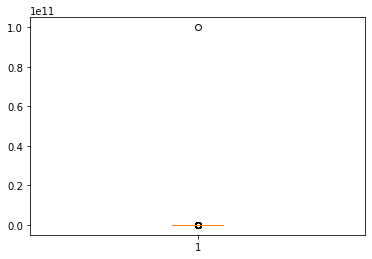

In [16]:
# checking if there are any values out of range
plt.boxplot(survey['Age'])
plt.show()

##### as we can see we have one very big outlier and probably some smaller ones that are not clear in the box plot


In [17]:
#i tried to remove the outliers using the same approach as i learned in the lab week 3:
survey['ageoutlier']=0
mean=survey['Age'].mean()
mean

79428148.31135821

In [18]:
std=survey['Age'].std()
std

2818299442.981952

In [19]:
survey.loc[abs(survey['Age']-mean)>(2*std), 'ageoutlier'] = 1

In [20]:
print(survey['ageoutlier'].sum())

1


In [21]:
#removing the one outlier
#survey = survey[survey.ageoutlier != 1]
survey=survey.loc[(survey['ageoutlier'] !=1),:]

In [22]:
#checking if they were removed
survey.shape

(1258, 24)

##### after using the above method, we still have outliers:


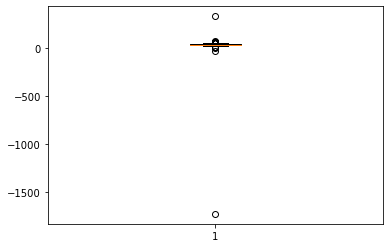

In [23]:
plt.boxplot(survey['Age'])
plt.show()

In [24]:
#checking for the out of range values, i assume no one older than 80 and younger than 15 years old d not work:
survey[survey['Age']<15]

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,ageoutlier
143,-29,Male,No,No,No,No,More than 1000,Yes,No,Yes,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,0
715,-1726,male,No,No,Yes,Sometimes,26-100,No,No,No,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,0
734,5,Male,No,No,No,No,100-500,No,Yes,Don't know,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,0
989,8,A little about you,Yes,Yes,Yes,Often,5-Jan,Yes,Yes,Yes,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
1090,11,male,Yes,No,No,Never,5-Jan,Yes,Yes,No,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,0
1127,-1,p,Yes,Yes,Yes,Often,5-Jan,Yes,Yes,Yes,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0


In [25]:
# as we can see there are still some non reasonable values (5 rows) in age younger than 15
survey[survey['Age']>80]
#there is still one value bigger than 80

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,ageoutlier
364,329,Male,No,No,Yes,Often,25-Jun,Yes,Yes,Yes,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,0


In [26]:
#now i try to remove the rows that contain values smaller than 15 and bigger than 80:
survey = survey.loc[(survey['Age']>15) & (survey['Age']<80)]
survey

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,ageoutlier
0,37,Female,No,No,Yes,Often,25-Jun,No,Yes,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,0
1,44,M,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,0
2,32,Male,No,No,No,Rarely,25-Jun,No,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,0
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,0
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,No,26-100,No,Yes,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,0
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,0
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,0
1257,46,f,No,No,No,No,100-500,Yes,Yes,No,...,Don't know,Yes,No,No,No,No,No,No,No,0


In [27]:
# checking if it worked:
assert survey['Age'].min()>=15
survey.shape

(1251, 24)

##### overall, 8 rows(outliers) were deleted (1259-8=1251)

C:\Users\Asus NP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


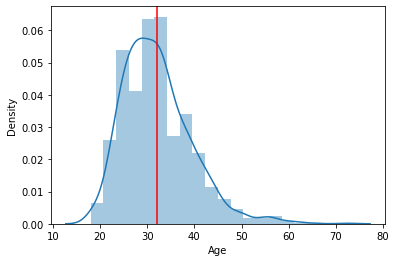

In [29]:
sns.distplot(survey["Age"], bins=20)
plt.axvline(x=survey.Age.mean(),
            color='red')
#we can see that after cleaning ,age column is almost normally distributed and most people conducting this survey are almost aged between 25 to 35
#with the mean of almost 32

### correcting the value inconsistencies


In [30]:
# third column(gender):
survey['Gender'].value_counts()

Male                                              612
male                                              204
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man                     

In [31]:
# applying lowercase function
survey['Gender']=survey['Gender'].str.lower()
# removing leading and trailing spaces
survey['Gender']=survey['Gender'].str.strip()
survey['Gender'].value_counts()

male                                              819
female                                            185
m                                                 150
f                                                  53
make                                                4
woman                                               4
cis male                                            3
man                                                 2
female (trans)                                      2
msle                                                1
guy (-ish) ^_^                                      1
male leaning androgynous                            1
trans woman                                         1
queer                                               1
neuter                                              1
agender                                             1
female (cis)                                        1
mail                                                1
malr                        

In [32]:
# reducing the number of categories to only three categories namely 'male','female' and 'others'
mapping={'m':'male','f':'female','woman':'female','make':'male','cis male':'male','man':'male','msle':'male','mail':'male',
         'female (cis)':'female','cis-female/femme':'female','malr':'male','femail':'female','cis man':'male','male (cis)':'male','male-ish':'male','maile':'male',
        'cis female':'female','something kinda male?':'male','mal':'male','femake':'female','guy (-ish) ^_^':'male','female (trans)':'others','agender':'others','queer':'others',
        'neuter':'others','trans woman':'others','male leaning androgynous':'others','androgyne':'others','genderqueer':'others','fluid':'others',
     'enby':'others','all':'others','non-binary':'others','queer/she/they':'others','trans-female':'others','ostensibly male, unsure what that really means':'others','nah':'others','a little about you':'others','p':'others'}
survey['Gender']=survey['Gender'].replace(mapping)
survey['Gender'].value_counts()

male      988
female    247
others     16
Name: Gender, dtype: int64

In [33]:
# to make the analysis easier, i grouped the answeres very_difficult and somewhat difficult to 'difficult', and the answers
# very_easy and somewhat_easy to 'easy' to only have 3 categories of answers for 'leave' feature : difficult, easy and don't know
mapping1={'Very difficult':'difficult','Somewhat difficult':'difficult','Very easy':'easy','Somewhat easy':'easy'}
survey['leave']=survey['leave'].replace(mapping1)
survey['leave'].value_counts()

Don't know    561
easy          468
difficult     222
Name: leave, dtype: int64

In [34]:
# again, to simplify the analysis and make it more Comprehensible, we reduced the number of categories in the 'no_employees'
# assuming companies with more than 500 employees as large and the rest as medium:
mapping2={'25-Jun':'medium', '26-100':'medium', '100-500':'medium', '5-Jan':'medium','500-1000':'large','More than 1000':'large'}
survey['no_employees']=survey['no_employees'].replace(mapping2)


##### now we check the value_counts for all of the remaining columns to see if there is anything that needs to be fixed:

In [36]:
# (family_history):
survey['family_history'].value_counts()

No     762
Yes    489
Name: family_history, dtype: int64

In [37]:
# (treatment):
survey['treatment'].value_counts()

Yes    632
No     619
Name: treatment, dtype: int64

In [38]:
# (no_employees)
survey['no_employees'].value_counts()

medium    910
large     341
Name: no_employees, dtype: int64

In [39]:
# (remote_work):
survey['remote_work'].value_counts()

No     880
Yes    371
Name: remote_work, dtype: int64

In [40]:
# (tech_company):
survey['tech_company'].value_counts()

Yes    1025
No      226
Name: tech_company, dtype: int64

In [41]:
# (benefits):
survey['benefits'].value_counts()

Yes           473
Don't know    407
No            371
Name: benefits, dtype: int64

In [42]:
# (care_options):
survey['care_options'].value_counts()

No          499
Yes         439
Not sure    313
Name: care_options, dtype: int64

In [43]:
# (wellness_program):
survey['wellness_program'].value_counts()

No            837
Yes           227
Don't know    187
Name: wellness_program, dtype: int64

In [44]:
# (seek_help):
survey['seek_help'].value_counts()

No            641
Don't know    363
Yes           247
Name: seek_help, dtype: int64

In [45]:
# (anonymity):
survey['anonymity'].value_counts()

Don't know    815
Yes           372
No             64
Name: anonymity, dtype: int64

In [46]:
# (leave):
survey['leave'].value_counts()

Don't know    561
easy          468
difficult     222
Name: leave, dtype: int64

In [47]:
# nintheenth column(mental_health_consequence):
survey['mental_health_consequence'].value_counts()

No       487
Maybe    476
Yes      288
Name: mental_health_consequence, dtype: int64

In [48]:
# (phys_health_consequence):
survey['phys_health_consequence'].value_counts()

No       920
Maybe    273
Yes       58
Name: phys_health_consequence, dtype: int64

In [49]:
# (coworkers):
survey['coworkers'].value_counts()

Some of them    771
No              258
Yes             222
Name: coworkers, dtype: int64

In [50]:
# (supervisor):
survey['supervisor'].value_counts()

Yes             512
No              390
Some of them    349
Name: supervisor, dtype: int64

In [51]:
# (mental_health_interview):
survey['mental_health_interview'].value_counts()

No       1003
Maybe     207
Yes        41
Name: mental_health_interview, dtype: int64

In [52]:
# (phys_health_interview):
survey['phys_health_interview'].value_counts()

Maybe    555
No       496
Yes      200
Name: phys_health_interview, dtype: int64

In [53]:
# (mental_vs_physical):
survey['mental_vs_physical'].value_counts()

Don't know    574
Yes           339
No            338
Name: mental_vs_physical, dtype: int64

In [54]:
# (obs_consequence):
survey['obs_consequence'].value_counts()

No     1070
Yes     181
Name: obs_consequence, dtype: int64

#  analysis on data

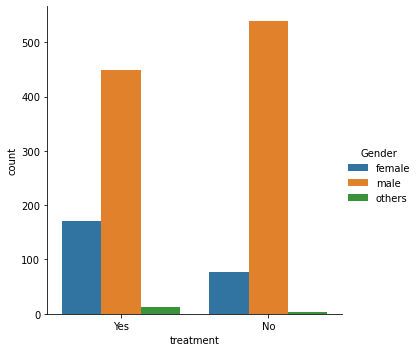

In [55]:
sns.catplot(data=survey,x='treatment',hue='Gender',kind='count')


##### although fewer woman participated in this survey, they were more willing to seek for treatment.

<AxesSubplot:xlabel='treatment', ylabel='Age'>

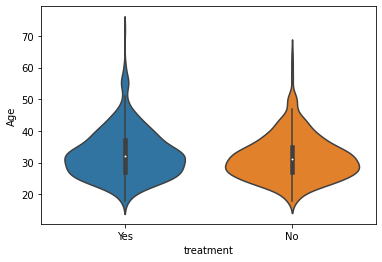

In [56]:
sns.violinplot(data=survey,x='treatment',y='Age') 


##### we understand that people who didnt seek treatment have higher probability to age under 30 and people who chose treatment have higher probability to age above 30.


<AxesSubplot:xlabel='family_history'>

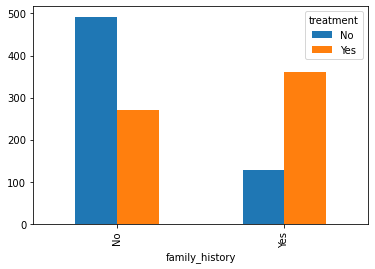

In [57]:
#in order to show the relationship between two categorical columns, i used cross tabulation method:
crosstabulation1=pd.crosstab(index=survey['family_history'],columns=survey['treatment'])
%matplotlib inline 
crosstabulation1.plot.bar()


##### from the bar chart we can understand that taking actions towards treatment among those employees who had family history of mental health was taken more serious than those who did not have

<AxesSubplot:xlabel='treatment'>

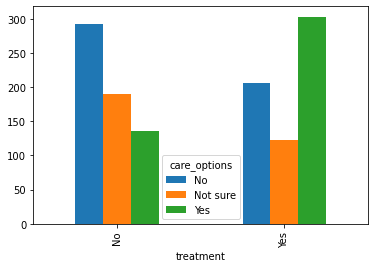

In [58]:
crosstabulation1=pd.crosstab(index=survey['treatment'],columns=survey['care_options'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### clearly, most of those who seek for treatment are aware of the mental health care service that their employer provieds, while among those who do not seek for treatment, the majority do not know about the mental health care services or are not sure about it.

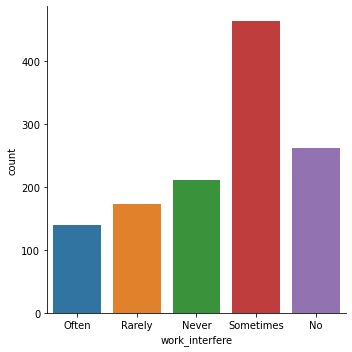

In [59]:
sns.catplot(data=survey,x='work_interfere',kind='count')
# number of people in different categories of work_interfere

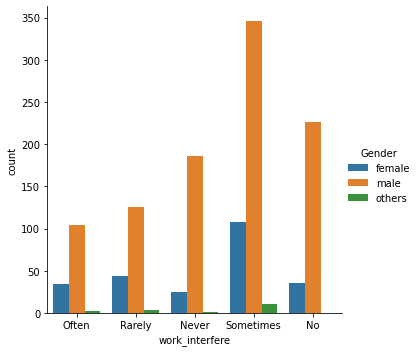

In [60]:
sns.catplot(data=survey,x='work_interfere',hue='Gender',kind='count')

##### both male and female voted for 'sometimes' work_intervention more than other options. 

In [61]:
survey['Age'].mean()

32.07673860911271

<AxesSubplot:xlabel='work_interfere'>

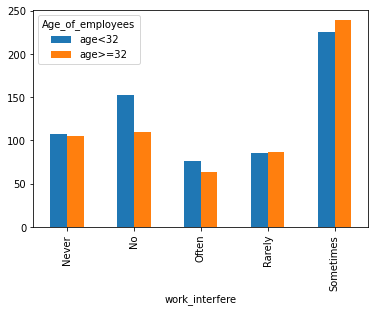

In [62]:
#in order to analyse the relationship between age and work_interfere in a better way, i created another column in the data frame that classifies age groups by mean:
survey['Age_of_employees']=['age<32' if i<32 else 'age>=32' for i in survey['Age']]
#in this step again i used the cross tabulation method
crosstabulation2=pd.crosstab(index=survey['work_interfere'],columns=survey['Age_of_employees'])
%matplotlib inline 
crosstabulation2.plot.bar()


##### from the bar chart we understand that the number of employees who did not have mental health issues and aged less than 32 was more than those who who did not have mental health issues and aged above 32. the same goes with employees who often felt work intervention as a result of mental health. the number of employees who rarely felt work intervention was approximately equal for those who aged>=30 and <30. same goes with never.

In [63]:
survey['Age_of_employees'].value_counts()

age<32     646
age>=32    605
Name: Age_of_employees, dtype: int64

<AxesSubplot:xlabel='work_interfere', ylabel='Age'>

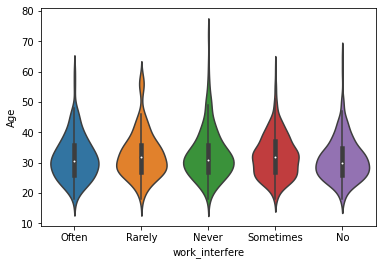

In [64]:
sns.violinplot(data=survey,x='work_interfere',y='Age')


##### using violin plot : the thick gray line is the interquartile range which is a measure of where the majority of the values lie. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability. white dot is the median so in this plot we that people who voted for rarely and no are more likely to age below 30 (27-30),while people who voted for  often and never have higher probability to age 30. people who sometimes feel work interfere have higher probability to age eighter 25/26 or 32/33.

<AxesSubplot:xlabel='treatment'>

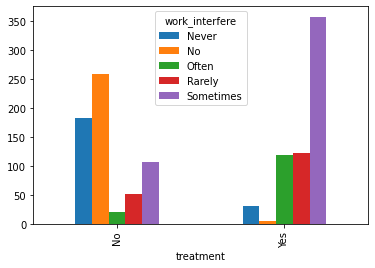

In [65]:
crosstabulation1=pd.crosstab(index=survey['treatment'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### the graph shows that those who have sought for treatment mostly have experienced work intervention (the majority voted for 'sometimes') on the other hand, a large number of those who have not sought for treatment eigther did not have mental health issues('No') or never felt any work intervention. 

<AxesSubplot:xlabel='remote_work'>

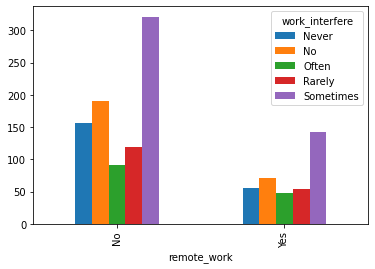

In [67]:
crosstabulation1=pd.crosstab(index=survey['remote_work'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### we cannot get any useful information from this graph! because in both categories of remote_work(yes and no), the proportion of work_interfere options is the same.

In [69]:
survey['no_employees'].value_counts()

medium    910
large     341
Name: no_employees, dtype: int64

## finding relationships 1:

##### at this stage, i wanted to know whether Having heard of or observed negative consequences for coworkers with mental health conditions in employee's workplace has effects on following variables: 
##### 1.mental_health_consequence(Do you think that discussing a mental health issue with your employer would have negative consequences?)
##### 2.coworkers(Would you be willing to discuss a mental health issue with your coworkers?)
##### 3.supervisor(Would you be willing to discuss a mental health issue with your direct supervisor(s)?
##### 4.mental_health_interview(Would you bring up a mental health issue with a potential employer in an interview?)
##### in general, my goal here was to see if observing or hearing about the negative consequences for coworkers with mental health conditions  makes employees less willing to talk about their mental health in the work environment.  so the following 4 graphs is related to this stage.

<AxesSubplot:xlabel='obs_consequence'>

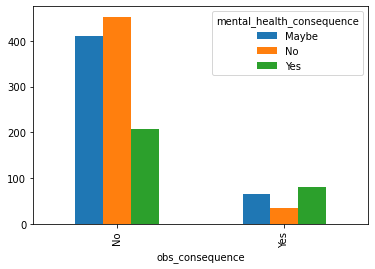

In [70]:

crosstabulation1=pd.crosstab(index=survey['obs_consequence'],columns=survey['mental_health_consequence'])
%matplotlib inline 
crosstabulation1.plot.bar()


##### among those with the answer 'yes' for obs_consequence, mostly think discussing a mental health issue with their employer would have a negative consequence.while people who answered'No' for obs_consequences, mostly think that discussing a mental health issue with their employer would not have negative consequence. so we can see that if people observe or hear negative consequences, in their own case, they would think talking about mental health problem would have negative consequence.

<AxesSubplot:xlabel='obs_consequence'>

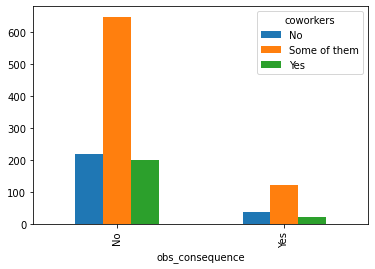

In [71]:
crosstabulation1=pd.crosstab(index=survey['obs_consequence'],columns=survey['coworkers'])
%matplotlib inline 
crosstabulation1.plot.bar()


##### among those with the answered 'yes' and 'No' for obs_consequence,the majority are willing to talk about their problem, but only with some of their coworkers which makes sense that can be because of the fact that people might not be close to all of their coworkers to talk about their mental health condition. (so no conclusion here)

<AxesSubplot:xlabel='obs_consequence'>

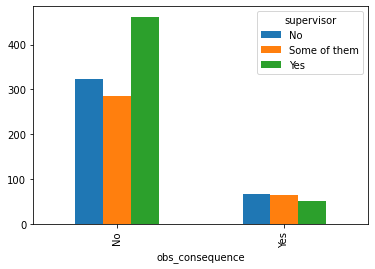

In [72]:
crosstabulation1=pd.crosstab(index=survey['obs_consequence'],columns=survey['supervisor'])
%matplotlib inline 
crosstabulation1.plot.bar()


##### among those who did not observe consequences the number of those who would talk about their mental health issue with the supervisor was higher than those who would not. However, among those with the answer 'Yes' for obs_consequences, there were slightly difference between the answeres 'yes' and 'no' for supervisor. 

<AxesSubplot:xlabel='obs_consequence'>

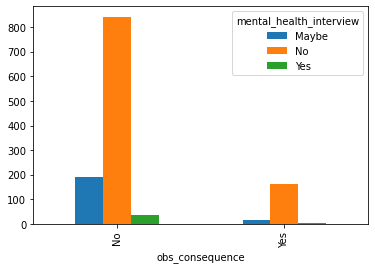

In [73]:
crosstabulation1=pd.crosstab(index=survey['obs_consequence'],columns=survey['mental_health_interview'])
%matplotlib inline 
crosstabulation1.plot.bar()


##### in both groups answering'yes' or 'No' for obs_consequence, almost all of them do not want to bring up a mental health issue with a potential employer in an interview.

##### from the charts above, we can understand that among those who have heard or have observed the negative consequences for coworkers with mental health conditions, most of them have a bad image about talking to their employer about their mental health issue and almost none of them wouldn't bring up such problem with a potential employer(probably because they think it risks their chance of getting hired).Moreover,when it comes to talking to supervisor about mental health issue,among those who did not observed consequences, the proportion who said they would discuss it with their supervisor was more significant than those observed. this means that companies should take some actions towards creating a more comfortable environment for employees so that they feel free to talk about it. however, we should keep in mind that in this survey 1070 people voted for 'No' and the number of employees who chose 'Yes' for obs_consequence question was only 181. Consequently, there conclusions are based on a small data and are not so strog.

## finding relationships 2:

##### at this step, i wanted to analyse and see if people who feel less comfortable to talk about their mental health condition or have bad image of it  experience more intervention in their work(or if there is any relationship). so the next four graphs is related to this step.

<AxesSubplot:xlabel='mental_health_consequence'>

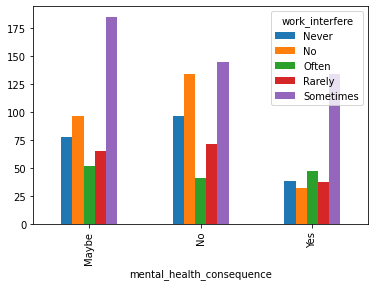

In [76]:
crosstabulation1=pd.crosstab(index=survey['mental_health_consequence'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### we can see that among those who think discussing a mental health condition with their employee would have negative consequences,  many of them 'sometimes' and 'often' feel work intervention, whereas the proportion of 'never' and 'rarely' for work_innterfere in this category is smaller than others.

<AxesSubplot:xlabel='coworkers'>

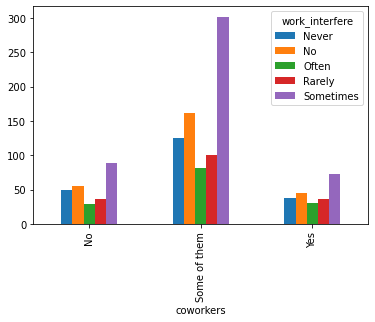

In [78]:
crosstabulation1=pd.crosstab(index=survey['coworkers'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### no special information 

<AxesSubplot:xlabel='supervisor'>

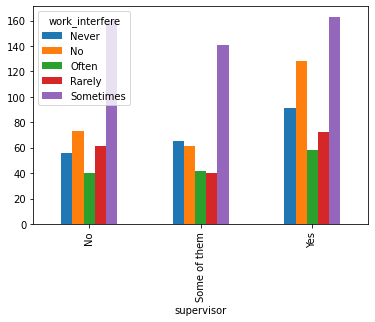

In [80]:
crosstabulation1=pd.crosstab(index=survey['supervisor'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### no special info!

<AxesSubplot:xlabel='mental_health_interview'>

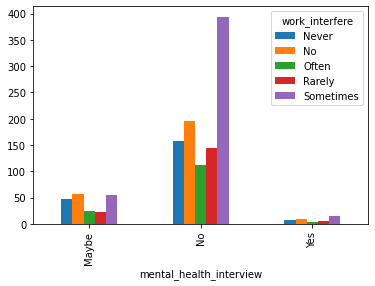

In [82]:
crosstabulation1=pd.crosstab(index=survey['mental_health_interview'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### the proportions are almost the same in each category of mental_health_interviw, so againg, no special information can be derived from this graph.

## finding relationships 3:

##### Finding relationships between columns 'benefit', 'leave', 'anonimity', 'seek_help', 'wellness_program' VS 'work_interfere':  so the next 5 graphs relates to this:

<AxesSubplot:xlabel='benefits'>

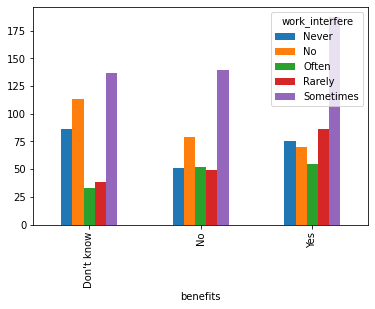

In [86]:
crosstabulation1=pd.crosstab(index=survey['benefits'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### not considering 'don't know' answer, we see among those employees whose employer provide mental health benefits, the proportion who voted  never and rarely for 'work_interfere' is higher than those who work with companies without mental health benefits provided. it means providing benefits can for some people prevent work_intervention, however, it cannot solve the problem for all of the  employees who suffer from mental health as many of them still voted for 'often' work interventio when the benefits are provided.

<AxesSubplot:xlabel='leave'>

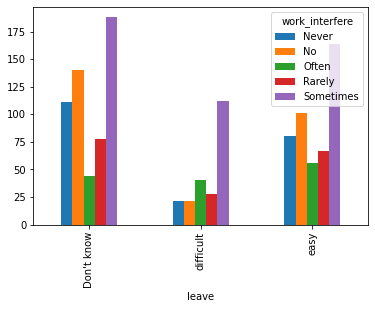

In [88]:
crosstabulation1=pd.crosstab(index=survey['leave'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### not considering 'Don't know', clearly we can see that among those companies that it is easy to take medical leave for  a mental health condition, the proportion of employees who often feel work intervention is lower than those who rarely and never feel work intervention. However the 'often' proprtion is higher than 'rarely' and 'never' for those companies that is diffiult to take medical leave from. as a result, again as it does not solve the whole problem, we can infere that caring about medical leave in companies can reduce work_intervention for many employees with mental health conditions.

<AxesSubplot:xlabel='anonymity'>

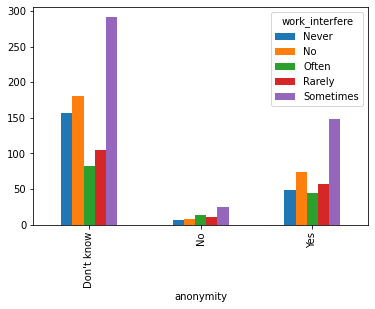

In [90]:
crosstabulation1=pd.crosstab(index=survey['anonymity'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### eventhouh a small number of employees voted for 'No', we can see that the proportion of people who voted 'often' work 'work_interfere' and their anonymity is not protected if they choose to take advantage of mental health resources is higher than those who voted for ' no' and 'never'. On the other hand, this proportion is lower in the group that said their anonymity is protected in this case. we can deduce that caring about privacy of employees in the case of having mental health problem can have direct effect on how much work intervention they feel.


<AxesSubplot:xlabel='seek_help'>

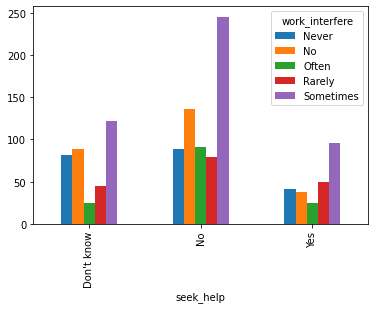

In [92]:
crosstabulation1=pd.crosstab(index=survey['seek_help'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### again, we can see that among those employees whose employer provides resources to learn how to seek help in case of mental health conditio, the proportion who often felt work intervention is lower than those who rarely and never felt work intevrvention. However, among those who answered 'No' for seek_help (which means their employer does not provide resources to learn how to seek help), this proportion is higher. the same conclusion can be made.

<AxesSubplot:xlabel='wellness_program'>

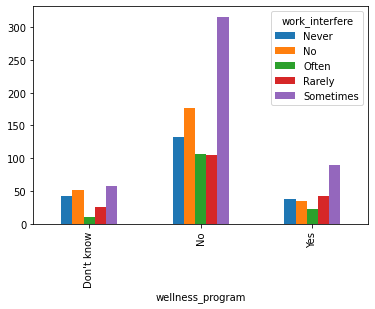

In [94]:
crosstabulation1=pd.crosstab(index=survey['wellness_program'],columns=survey['work_interfere'])
%matplotlib inline 
crosstabulation1.plot.bar()

##### same conclusion but with less impact(meaning that whether an employee's employer has ever discussed mental health as part of an employee wellness program does not have strong relationship with how often an amployee feels work intervention.)

## finding relationships 4:

##### In the 5 following graphs, we are visualizing the relationship between 'benefit', 'leave', 'anonymity', 'seek_help', 'wellness program' VS 'no-employees':

<AxesSubplot:xlabel='no_employees', ylabel='Count'>

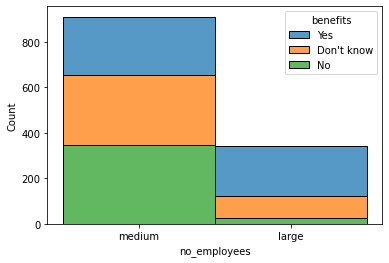

In [97]:
%matplotlib inline

sns.histplot(binwidth=0.5, x="no_employees", hue="benefits", data=survey, stat="count", multiple="stack")

##### we can see that in large companies they care more about providing mental health benefits.

<AxesSubplot:xlabel='no_employees', ylabel='Count'>

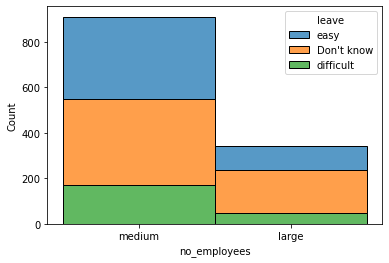

In [99]:
%matplotlib inline

sns.histplot(binwidth=0.5, x="no_employees", hue="leave", data=survey, stat="count", multiple="stack")

##### no difference in large and medium size companies in case of easily letting employees take medical leave for mental health condition.


<AxesSubplot:xlabel='no_employees', ylabel='Count'>

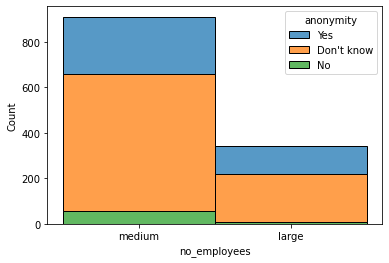

In [101]:
%matplotlib inline

sns.histplot(binwidth=0.5, x="no_employees", hue="anonymity", data=survey, stat="count", multiple="stack")

<AxesSubplot:xlabel='no_employees', ylabel='Count'>

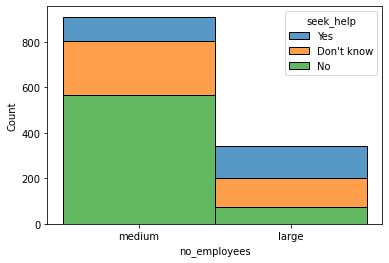

In [102]:
%matplotlib inline

sns.histplot(binwidth=0.5, x="no_employees", hue="seek_help", data=survey, stat="count", multiple="stack")

##### at first glance, it is obvius that in medium companies, employers oay less attention to provide resources to learn about how to seek help in case of having mental health condition.

<AxesSubplot:xlabel='no_employees', ylabel='Count'>

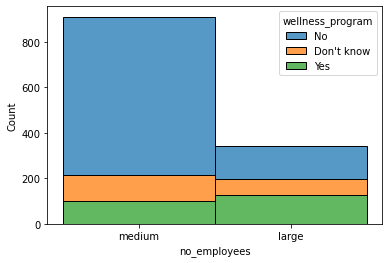

In [104]:
%matplotlib inline
sns.histplot(binwidth=0.5, x="no_employees", hue="wellness_program", data=survey, stat="count", multiple="stack")

##### same conclusion, in smaller companies, employers care less about discussing mental health as part of an employee wellness program.

<AxesSubplot:xlabel='work_interfere', ylabel='Count'>

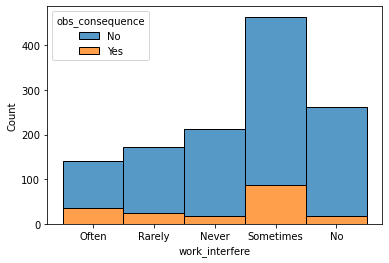

In [106]:
%matplotlib inline
sns.histplot(binwidth=0.5, x="work_interfere", hue="obs_consequence", data=survey, stat="count", multiple="stack")

##### observing consequences affects feeling intervention at work.

## Encoding

In [108]:
# label encoding:
survey0=survey.copy()
# we do not include 'Age' column as it is already numerical
encoded_columns = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere','no_employees','remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
lbl_encoder=LabelEncoder()
for i in encoded_columns:
    lbl_encoder.fit(survey0[i])
    survey0[i] = lbl_encoder.transform(survey0[i])



In [109]:
#to check if it worked:
survey0.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,ageoutlier,Age_of_employees
0,37,0,0,0,1,2,1,0,1,2,...,1,1,1,2,1,0,2,0,0,age>=32
1,44,1,0,0,0,3,0,0,0,0,...,0,1,0,0,1,1,0,0,0,age>=32
2,32,1,0,0,0,3,1,0,1,1,...,1,1,2,2,2,2,1,0,0,age>=32
3,31,1,0,1,1,2,1,0,1,1,...,2,2,1,0,0,0,1,1,0,age<32
4,31,1,0,0,0,0,1,1,1,2,...,1,1,1,2,2,2,0,0,0,age<32


## Heatmap

In [1]:
#before creating the heatmap, i dropped the ageoutlier and age_of_employee columns that i created before. i will dropp them because they are not useful anymore.
survey0=survey0.drop(['ageoutlier'], axis= 1)
survey0=survey0.drop(['Age_of_employees'], axis= 1)

NameError: name 'survey0' is not defined

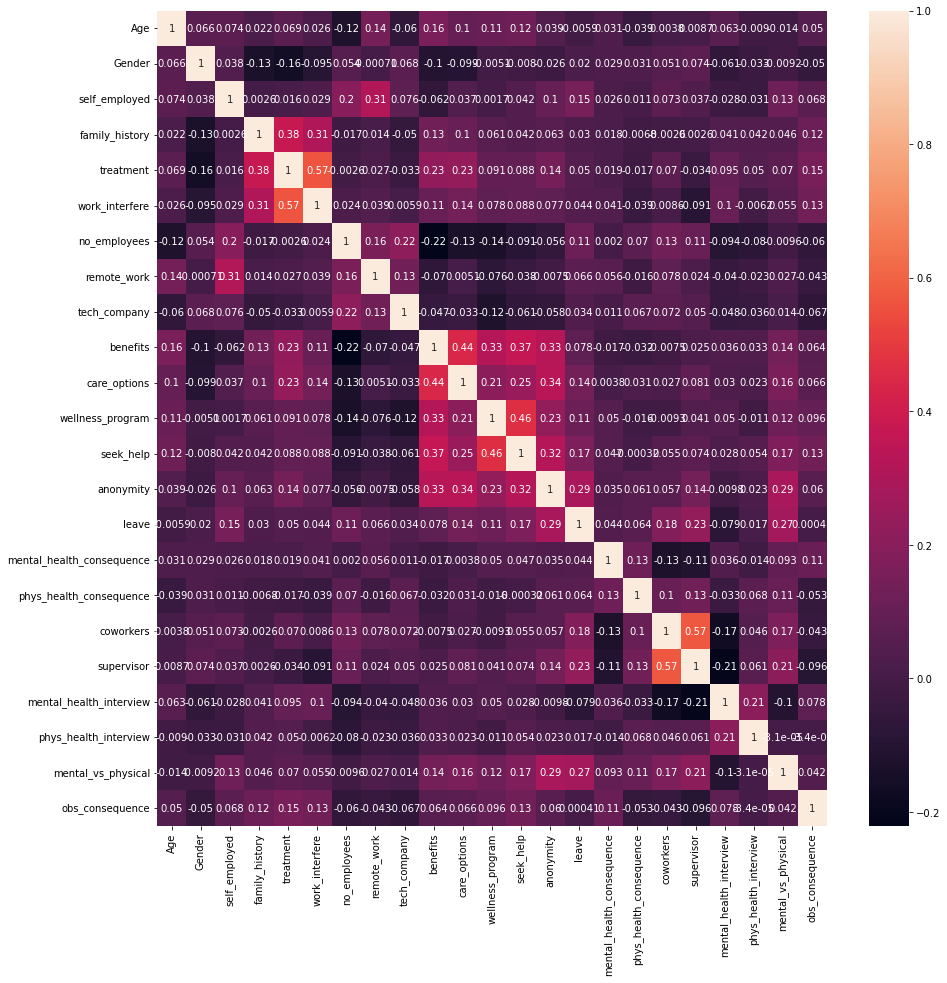

In [111]:
# here i created a heatmap to see the correlation between variables
#the codes relating to correlation and heatmap is similar to the lab feedbac 04 with changes in size and color and instead of pearson i used spearman
corr =survey0.corr(method = 'spearman')
plt.figure(figsize = (15,15))
ax = sns.heatmap(corr, annot = True)


In [113]:
# identifying the pairs of variables with the strongest correlation (this way is easier than finding the correlation numbers by looking at the graph):
corr1=corr.copy()
corr1.index.name = 'var1'
corr1.reset_index(inplace=True)
corr_pair=corr1.melt(id_vars=['var1'])
corr_pair=corr_pair.rename(columns={'variable': 'var2','value': 'corr'})
corr_pair = corr_pair.drop(corr_pair[corr_pair['var1']==corr_pair['var2']].index)



In [114]:
corr_pair=corr_pair.sort_values(by ='corr',ascending=False)

print()
print("Top ten most positively correlated pairs of variables")
print(corr_pair.head(10))

print()
print("Top ten most negatively correlated pairs of variables (in reverse order)")
print(corr_pair.tail(10))


corr_pair['abs_corr']=abs(corr_pair['corr'])

corr_pair=corr_pair.sort_values(by ='abs_corr',ascending=False)

print()
print("Top ten most correlated pairs of variables with 'work_interfere'")
print(corr_pair[corr_pair['var1']=='work_interfere'].head(10))


Top ten most positively correlated pairs of variables
                 var1              var2      corr
431         coworkers        supervisor  0.571820
409        supervisor         coworkers  0.571820
119         treatment    work_interfere  0.565393
97     work_interfere         treatment  0.565393
265         seek_help  wellness_program  0.463808
287  wellness_program         seek_help  0.463808
217      care_options          benefits  0.438058
239          benefits      care_options  0.438058
73          treatment    family_history  0.376674
95     family_history         treatment  0.376674

Top ten most negatively correlated pairs of variables (in reverse order)
                        var1                     var2      corr
259             no_employees         wellness_program -0.139601
149         wellness_program             no_employees -0.139601
93                    Gender                treatment -0.159410
27                 treatment                   Gender -0.159410
4

## MCA

In [116]:
#for mca, we have to use the original dataset with 'category' type values, so i created another copy of this dataset:
survey1=survey.copy()
#the first thing we need to do is to create a new data frame with selected variables(excluding the one of the columns from each pair of the highly correlated variables):
# i excluded 'care_options','seek_help' and 'coworkers':
#we also need to drop the two last columns as we created them during the previous analysis and they are not useful:
survey1=survey1.drop(['care_options'],axis=1)
survey1=survey1.drop(['seek_help'],axis=1)
survey1=survey1.drop(['coworkers'],axis=1)
survey1=survey1.drop(['ageoutlier'],axis=1)
survey1=survey1.drop(['Age_of_employees'],axis=1)


survey1.columns




Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'wellness_program', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [117]:
survey1.shape
#number of columns decreased to 20

(1251, 20)

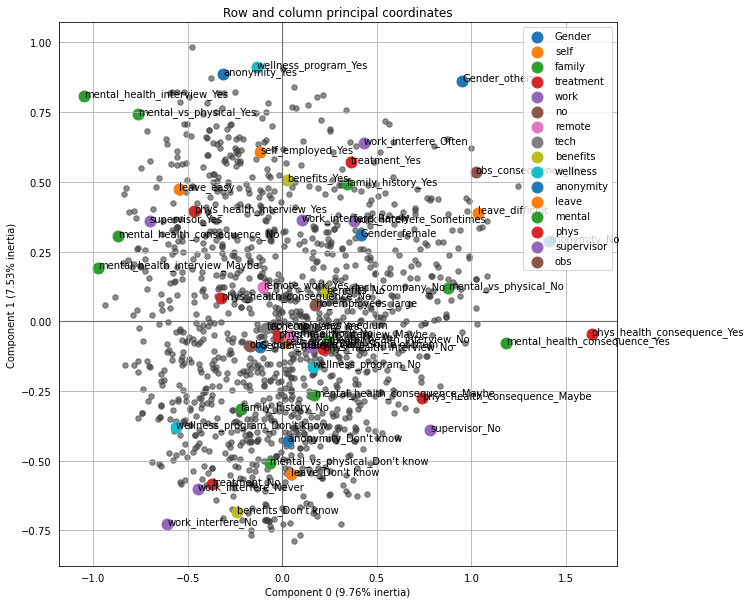

In [118]:
mca = prince.MCA(n_components=2, copy=True, engine='auto')
mca = mca.fit(survey1.iloc[:, 1:])
ax = mca.plot_coordinates(
    X=survey1.iloc[:, 1:],
    ax=None,
    figsize=(10,10),
     show_row_points=True,
    row_points_size=30,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=120,
    show_column_labels=True,
    legend_n_cols=1
    )

In [119]:
mca.explained_inertia_

[0.09757911072233895, 0.07528635488512994]

In [121]:
survey1.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'wellness_program', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

## Chi2

In [122]:
# putting age column into categories to be able to use it in chi2:
bins_Age=[15,30,40,50,80]
Age_labels=[1,2,3,4]
survey1['Age']=pd.cut(survey1['Age'],bins=bins_Age,labels=Age_labels)
# coll = ['Gender','self_employed','family_history','treatment','work_interfere','no_employees','remote_work','tech_company','benefits',
#                   'wellness_program','anonymity','leave','mental_health_consequence','phys_health_consequence','supervisor'
#                   ,'mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence']
# for i in coll:
#     survey1[i]=survey1[i].astype('category',copy=False)
coll =['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'wellness_program', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
lbl_encoder=LabelEncoder()
for i in coll:
    lbl_encoder.fit(survey1[i])
    survey1[i] = lbl_encoder.transform(survey1[i])

In [123]:
survey1

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,wellness_program,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2,0,0,0,1,2,1,0,1,2,1,2,2,1,1,2,1,0,2,0
1,3,1,0,0,0,3,0,0,0,0,0,0,0,0,1,0,1,1,0,0
2,2,1,0,0,0,3,1,0,1,1,1,0,1,1,1,2,2,2,1,0
3,2,1,0,1,1,2,1,0,1,1,1,1,1,2,2,0,0,0,1,1
4,2,1,0,0,0,0,1,1,1,2,0,0,0,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1,1,0,0,1,1,1,0,1,1,1,0,2,1,1,1,1,1,0,0
1255,2,1,0,1,1,2,1,1,1,2,1,2,1,1,1,2,1,1,2,0
1256,2,1,0,1,1,4,0,0,1,2,1,0,1,2,2,0,1,1,1,0
1257,3,0,0,0,0,1,1,1,1,1,1,0,0,2,1,0,1,1,1,0


In [124]:
for i in survey1.columns:
    print(survey1[i].unique())

[2, 3, 1, 4]
Categories (4, int64): [1 < 2 < 3 < 4]
[0 1 2]
[0 1]
[0 1]
[1 0]
[2 3 0 4 1]
[1 0]
[0 1]
[1 0]
[2 0 1]
[1 0 2]
[2 0 1]
[2 0 1]
[1 0 2]
[1 2 0]
[2 0 1]
[1 2 0]
[0 1 2]
[2 0 1]
[0 1]


In [125]:
# applying CHI 2:
# another method for getting the important features:
# assigning all the features except target variable to x:
X = survey1.drop('work_interfere', axis=1) 
# assigning the target variable to y:
y = survey1['work_interfere'] 
# categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)
# printing feature scores:
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 Age: 2.204832
 Gender: 3.358315
 self_employed: 9.471017
 family_history: 96.441660
 treatment: 290.742356
 no_employees: 1.546159
 remote_work: 2.927882
 tech_company: 0.628667
 benefits: 24.990539
 wellness_program: 4.644840
 anonymity: 14.277903
 leave: 6.907579
 mental_health_consequence: 6.171592
 phys_health_consequence: 0.746091
 supervisor: 7.707842
 mental_health_interview: 2.902299
 phys_health_interview: 1.386074
 mental_vs_physical: 3.218255
 obs_consequence: 34.237506


C:\Users\Asus NP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


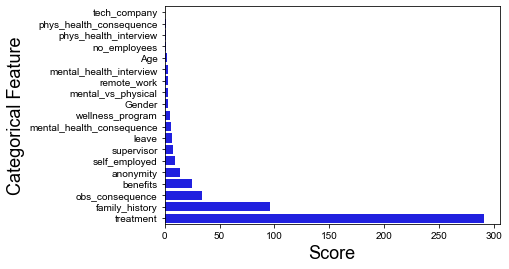

In [126]:
# plotting the scores to make it easier to compare:
dataset = pd.DataFrame()
dataset['feature'] = X.columns[ range(len(sf_fit.scores_))]
dataset['scores'] = sf_fit.scores_
dataset = dataset.sort_values(by='scores', ascending=True)
sns.barplot(dataset['scores'], dataset['feature'], color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

##### according to chi2 results,first i will choose 5 eatures that havethe most effect on my target variable so i created a new data frame with those variables only

# Modelling

## Random Forest:

In [128]:
#the two following comments were codes that were used to check if the accuracy of the model changes by using more and fewer columns from chi2 graph, but it did not change.
#survey2=survey1.loc[:,['work_interfere','supervisor','self_employed','anonymity','leave','benefits','obs_consequence','family_history','treatment']]
#survey2=survey1.loc[:,['work_interfere','family_history','treatment']]
survey2=survey1.loc[:,['work_interfere','leave','benefits','obs_consequence','family_history','treatment']]
#saving the column names:
column_names=['leave','benefits','obs_consequence','family_history','treatment']
#RANDOM FOREST MODELLING:
X = survey2.drop('work_interfere', axis=1)
y = survey2['work_interfere']
#spliting the data into training and test sets:
#i will use 10 percent of my data for test because my dataset is not that large and i will use 90 percent for training to get 
#more accuracy.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [129]:
#creating the model:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_predict = random_forest_classifier.predict(X_test)

In [130]:
#checking the accuracy before tuning the hyperparameters:
print(f'initial Train Accuracy - : {random_forest_classifier.score(X_train,y_train):.3f}')
print(f'initial Test Accuracy - : {random_forest_classifier.score(X_test,y_test):.3f}')


initial Train Accuracy - : 0.523
initial Test Accuracy - : 0.468


In [131]:
print(classification_report(y_test, random_forest_predict))
print('\n')

              precision    recall  f1-score   support

           0       0.67      0.11      0.18        19
           1       0.44      0.92      0.60        26
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        19
           4       0.52      0.70      0.59        47

    accuracy                           0.47       126
   macro avg       0.33      0.35      0.28       126
weighted avg       0.38      0.47      0.37       126





C:\Users\Asus NP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus NP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus NP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##  Random Forest hyperparameter tuning using grid search 

In [132]:
RF_model=RandomForestClassifier(random_state=42 )
param_grid={'n_estimators':[100,200,300,400],
          'max_features':['auto','sqrt'],
           'max_depth':[6,7,8],
           'criterion':['gini','entropy'],
           'bootstrap':[True,False]}
train=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10,scoring='accuracy')

In [133]:
train.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [134]:
train.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [135]:
finalmodel=RandomForestClassifier(bootstrap= True,
 criterion= 'gini',
 max_depth= 6,
 max_features= 'auto',
 n_estimators=100,random_state=42 )

In [136]:
finalmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [137]:
#checking the accuracy after tuning the hyperparameters:
print(f'after tuning Train Accuracy - : {finalmodel.score(X_train,y_train):.3f}')
print(f'after tuning Test Accuracy - : {finalmodel.score(X_test,y_test):.3f}')

after tuning Train Accuracy - : 0.523
after tuning Test Accuracy - : 0.476


In [138]:
print(classification_report(y_test, finalmodel.predict(X_test)))
print('\n')

              precision    recall  f1-score   support

           0       0.33      0.05      0.09        19
           1       0.44      0.92      0.60        26
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        19
           4       0.53      0.74      0.62        47

    accuracy                           0.48       126
   macro avg       0.26      0.34      0.26       126
weighted avg       0.34      0.48      0.37       126





##### the accuracy impovement is not significant.

### feature importance:

In [164]:
finalmodel.feature_importances_
feature_importances = [ i for i in finalmodel.feature_importances_]
feature_importances

[0.12960382121263941,
 0.13737528178961525,
 0.06930727019531634,
 0.12242683658026322,
 0.5412867902221657]

In [165]:
column_names

['leave', 'benefits', 'obs_consequence', 'family_history', 'treatment']

<BarContainer object of 5 artists>

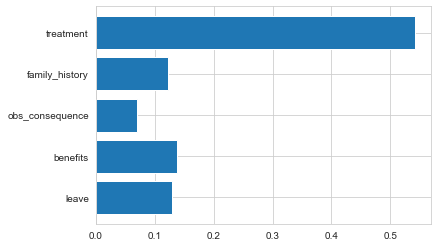

In [166]:
#plotting the features for easier understanding:
plt.barh(column_names,feature_importances)

## Decision Tree:

In [143]:
#trying decision tree:
decision_tree_classifier=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=3,min_samples_leaf=5)
decision_tree_classifier.fit(X_train,y_train)
decision_tree_predict = decision_tree_classifier.predict(X_test)

In [144]:
print(f'initial Train Accuracy - : {decision_tree_classifier.score(X_train,y_train):.3f}')
print(f'initial Test Accuracy - : {decision_tree_classifier.score(X_test,y_test):.3f}')

initial Train Accuracy - : 0.493
initial Test Accuracy - : 0.484


In [145]:
#EVALUATION:
print(classification_report(y_test, decision_tree_predict))
print('\n')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.42      0.88      0.57        26
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        19
           4       0.54      0.81      0.64        47

    accuracy                           0.48       126
   macro avg       0.19      0.34      0.24       126
weighted avg       0.29      0.48      0.36       126





C:\Users\Asus NP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus NP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus NP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision tree hyperparameter tuning using grid search:

In [146]:
DT_model=DecisionTreeClassifier(random_state=42)
param_grid2={'max_depth':[3,5,7,10],
            'criterion':['gini','entropy'],
            }
train2=GridSearchCV(estimator=DT_model,param_grid=param_grid2,cv=10,scoring='accuracy')
train2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10]},
             scoring='accuracy')

In [147]:
train2.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [148]:
finalmodel2=DecisionTreeClassifier(criterion='gini',
 max_depth= 3,
)
finalmodel2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [149]:
#checking the accuracy after tuning:
print(f'after tuning Train Accuracy - : {finalmodel2.score(X_train,y_train):.3f}')
print(f'after tuning Test Accuracy - : {finalmodel2.score(X_test,y_test):.3f}')

after tuning Train Accuracy - : 0.496
after tuning Test Accuracy - : 0.484


In [150]:
print(classification_report(y_test, finalmodel2.predict(X_test)))
print('\n')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.42      0.92      0.58        26
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        19
           4       0.54      0.79      0.64        47

    accuracy                           0.48       126
   macro avg       0.19      0.34      0.24       126
weighted avg       0.29      0.48      0.36       126





C:\Users\Asus NP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus NP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus NP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Xgboost

In [151]:
# the code was used from 'https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/' website.

In [152]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [153]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [161]:
# to see the parameters of the model:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


In [162]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [163]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.24%
